In [2]:
from os import listdir
from os.path import isfile, join
from math import log
from pathlib import Path
import matplotlib.pyplot as plt
import requests
import re
from tqdm import tqdm

In [4]:
data_path = '../data'
files = [join(data_path, f) for f in listdir(data_path) if isfile(join(data_path, f))]
len(files)


1180

In [5]:
texts = []

for filepath in tqdm(files):
    with open(filepath,'r',encoding = 'utf-8') as f:
        text = f.read()
        texts.append((text,len(text)))


100%|████████████████████████████████████████████████████████████████████████████| 1180/1180 [00:00<00:00, 2836.50it/s]


In [7]:
file_sizes = [x[1] for x in texts]

In [9]:
file_sizes.sort(reverse=True)

In [166]:
list(enumerate(file_sizes))

[(0, 560054),
 (1, 397912),
 (2, 396433),
 (3, 377867),
 (4, 335096),
 (5, 263259),
 (6, 260926),
 (7, 251625),
 (8, 249234),
 (9, 247419),
 (10, 246943),
 (11, 246472),
 (12, 242040),
 (13, 240315),
 (14, 236092),
 (15, 234368),
 (16, 228908),
 (17, 225491),
 (18, 225365),
 (19, 222863),
 (20, 222773),
 (21, 220416),
 (22, 216250),
 (23, 208967),
 (24, 208139),
 (25, 208090),
 (26, 203106),
 (27, 182339),
 (28, 181052),
 (29, 176119),
 (30, 174921),
 (31, 174226),
 (32, 173335),
 (33, 171460),
 (34, 170495),
 (35, 168574),
 (36, 168129),
 (37, 162698),
 (38, 156259),
 (39, 155527),
 (40, 148137),
 (41, 146672),
 (42, 144573),
 (43, 144363),
 (44, 142416),
 (45, 141409),
 (46, 138946),
 (47, 137170),
 (48, 136040),
 (49, 131863),
 (50, 129257),
 (51, 128635),
 (52, 124983),
 (53, 124056),
 (54, 122320),
 (55, 122277),
 (56, 120882),
 (57, 120318),
 (58, 120065),
 (59, 117926),
 (60, 117071),
 (61, 116848),
 (62, 116775),
 (63, 115507),
 (64, 113121),
 (65, 112966),
 (66, 108153),
 (67,

In [13]:
file_sizes[50]

129257

In [15]:
texts = list(map(lambda x: x[0],filter(lambda x: x[1]>=file_sizes[49],texts)))

In [ ]:
texts[0]

In [30]:
def check_if_full_sentence(sentence):
    if sentence.startswith(' Nr', 0) or \
       re.match(r'^ [0-9]+', sentence) or \
       re.match(r'^ [a|ą|b|c|ć|d|e|ę|f|g|h|i|j|k|l|ł|m|n|ń|o|ó|p|r|s|ś|t|u|w|y|z|ź|ż]', sentence) or \
       re.match(r'^[A|Ą|B|C|Ć|D|E|Ę|F|G|H|I|J|K|L|Ł|M|N|Ń|O|Ó|P|R|S|Ś|T|U|W|Y|Z|Ź|Ż]', sentence) or \
       re.match(r'^\n[0-9]+', sentence):
        return False
    return True

def split_into_full_sentences(text):
    full_sentences = []
    excpected_sentences = text.split('.')
    for excpected_sentence in excpected_sentences:
        if len(full_sentences) == 0:
            full_sentences.append(excpected_sentence)
            continue
        if excpected_sentence=='':
            continue
        if not check_if_full_sentence(excpected_sentence):
            full_sentences[-1] = full_sentences[-1] +'.'+ excpected_sentence
        else:
            full_sentences.append(excpected_sentence)
    return full_sentences
        
    

In [35]:
sentences = []
for text in tqdm(texts):
    sentences.append(split_into_full_sentences(text))

100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 110.86it/s]


In [172]:
sentences[0][5]

'Zwalczanie nieuczciwej konkurencji reguluje odrębna ustawa'

In [37]:
capital_letters = 'aąbcćdeęfghijklłmnńoópqrsśtuvwyxzźż'.upper()
for doc_id in tqdm(range(len(sentences))):
    document=sentences[doc_id]
    for i,sentence in enumerate(document):
        j=0
        c= sentence[0]
        while not c in capital_letters and j<len(sentence)-1:
            j+=1
            c = sentence[j]
            
        if j == len(sentence):
            document[i] =['']
        else:
            document[i]= sentence[j:]
    sentences[doc_id] = list(filter(lambda x: not x=='',document))

            
            

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 84.46it/s]


In [29]:
capital_letters

'AĄBCĆDEĘFGHIJKLŁMNŃOÓPQRSŚTUVWYXZŹŻ'

In [77]:
class enumerator_2d:
    def __init__(self,list_2d):
        self._list_2d = list_2d
        self._len =0
        for i in range(len(list_2d)):
            self._len += len(list_2d[i])
    def __len__(self):
        return self._len
    

    def __iter__(self):
        for i in range(len(self._list_2d)):
            for j in range(len(self._list_2d[i])):
                yield i,j

In [80]:
for i,j in tqdm(enumerator_2d(sentences)):
    pass

100%|███████████████████████████████████████████████████████████████████████| 63110/63110 [00:00<00:00, 2103568.37it/s]


In [ ]:
lemitized_docs =[]
lemitised_senteces_current_doc = []
for doc in tqdm(sentences):
    lemitised_senteces_current_doc = []
    for sentence in doc:
        text = requests.post('http://localhost:9200', data = sentence.encode('utf-8'), headers={'Content-type': 'text/plain; charset=utf-8'}).text      
        lemitised_senteces_current_doc.append(text)
    lemitized_docs.append(lemitised_senteces_current_doc)
    


In [177]:
import pickle

In [289]:
# with open('pickled_lemitised_sentences_fixed','wb') as f:
#     pickle.dump(lemitized_docs,f)
with open('pickled_lemitised_sentences','rb') as f:
    lemitized_docs = pickle.load(f)


In [291]:
import numpy as np
np.mean([len(x) for x in lemitized_docs])

1262.2

In [292]:
sentences[0][0]

'USTAWA\n                            z dnia 30 czerwca 2000 r'

In [293]:
s = lemitized_docs[7][20]
[line.split('\t') for line in s.split('\n') if line != '']

[['Przeznaczenie', 'none'],
 ['', 'przeznaczenie', 'subst:sg:nom:n', 'disamb'],
 ['celne', 'space'],
 ['', 'celny', 'adj:sg:nom:n:pos', 'disamb'],
 ['to', 'space'],
 ['', 'ten', 'adj:sg:nom:n:pos', 'disamb'],
 [':', 'none'],
 ['', ':', 'interp', 'disamb'],
 ['1', 'none'],
 ['', '1', 'adj:sg:nom:m3:pos', 'disamb'],
 [')', 'none'],
 ['', ')', 'interp', 'disamb'],
 ['objęcie', 'space'],
 ['', 'objąć', 'ger:sg:nom:n:perf:aff', 'disamb'],
 ['towaru', 'space'],
 ['', 'towar', 'subst:sg:gen:m3', 'disamb'],
 ['procedurą', 'space'],
 ['', 'procedura', 'subst:sg:inst:f', 'disamb'],
 ['celną', 'space'],
 ['', 'celny', 'adj:sg:inst:f:pos', 'disamb'],
 [',', 'none'],
 ['', ',', 'interp', 'disamb'],
 ['2', 'none'],
 ['', '2', 'adj:sg:nom:n:pos', 'disamb'],
 [')', 'none'],
 ['', ')', 'interp', 'disamb'],
 ['wprowadzenie', 'space'],
 ['', 'wprowadzić', 'ger:sg:acc:n:perf:aff', 'disamb'],
 ['towaru', 'space'],
 ['', 'towar', 'subst:sg:gen:m3', 'disamb'],
 ['do', 'space'],
 ['', 'do', 'prep:gen', 'disam

In [294]:
lemitized_docs[2][7]

'Art\tnone\n\tartykuł\tbrev:pun\tdisamb\n.\tnone\n\t.\tinterp\tdisamb\n3\tspace\n\t3\tadj:sg:nom:m3:pos\tdisamb\n\n'

In [295]:
s_lemmatized_docs = []
for doc in tqdm(lemitized_docs):
    s_lem_doc = []
    for s in doc:
        s_lem_doc.append([line.split('\t') for line in s.split('\n') if line != ''])
    s_lemmatized_docs.append(s_lem_doc)   

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:11<00:00,  4.30it/s]


In [296]:
s_lemmatized_docs[14][0]

[['Dz', 'none'],
 ['', 'dziennik', 'brev:pun', 'disamb'],
 ['.', 'none'],
 ['', '.', 'interp', 'disamb'],
 ['U', 'none'],
 ['', 'ustawa', 'brev:pun', 'disamb'],
 ['.', 'none'],
 ['', '.', 'interp', 'disamb'],
 ['z', 'space'],
 ['', 'z', 'prep:gen:nwok', 'disamb'],
 ['1997', 'space'],
 ['', '1997', 'adj:sg:gen:m3:pos', 'disamb'],
 ['r', 'space'],
 ['', 'rok', 'brev:pun', 'disamb'],
 ['.', 'none'],
 ['', '.', 'interp', 'disamb'],
 ['Nr', 'newline'],
 ['', 'numer', 'brev:npun', 'disamb'],
 ['137', 'space'],
 ['', '137', 'num:pl:nom:m3:rec', 'disamb'],
 [',', 'none'],
 ['', ',', 'interp', 'disamb'],
 ['poz', 'space'],
 ['', 'pozycja', 'brev:pun', 'disamb'],
 ['.', 'none'],
 ['', '.', 'interp', 'disamb'],
 ['926', 'space'],
 ['', '926', 'adj:sg:nom:f:pos', 'disamb'],
 ['USTAWA', 'none'],
 ['', 'ustawa', 'subst:sg:nom:f', 'disamb'],
 ['z', 'none'],
 ['', 'z', 'prep:gen:nwok', 'disamb'],
 ['dnia', 'space'],
 ['', 'dzień', 'subst:sg:gen:m3', 'disamb'],
 ['29', 'space'],
 ['', '29', 'adj:sg:gen

In [297]:
cap_expr = []
for s_doc in tqdm(s_lemmatized_docs):
    for split_s in s_doc:
        ongoing_expr = False
        #ommit first word
        for i in range(2, len(split_s), 2):
            sentence = split_s[i][0]
            if sentence[0].isupper():
                not_inflected_form = split_s[i+1][1].title()      
                if ongoing_expr:# last word was Capitlised, so this one is part of the expression
                    not_inflected_expr = cap_expr[-1][1] + ' ' + not_inflected_form
                    cap_expr[-1] = (cap_expr[-1][0] + ' ' + sentence, not_inflected_expr)
                else:
                    cap_expr.append((sentence, not_inflected_form))
                    ongoing_expr = True # start of expresion
            else: # word doesn't belong to any expresion, so breaks chain
                ongoing_expr = False  



100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 37.48it/s]


In [304]:
cap_expr.__len__()

35513

In [305]:
cap_expr_dict = {}
for expr,base_form in tqdm(cap_expr):
    cap_expr_dict[base_form] = cap_expr_dict.get(base_form,0)+ 1

100%|███████████████████████████████████████████████████████████████████████| 35513/35513 [00:00<00:00, 1223980.59it/s]


In [306]:
cap_expr_counted = list(cap_expr_dict.items())

In [307]:
cap_expr_counted.sort(key = lambda x: x[1],reverse = True)

In [308]:
#zad6
cap_expr_counted[:50]

[('Numer', 7781),
 ('Dziennik', 1171),
 ('Artykuł', 1028),
 ('Ustawa', 997),
 ('Rzeczpospolita Polski', 688),
 ('Policja', 432),
 ('Kodeks', 420),
 ('Skarb Państwo', 384),
 ('Dzieje Apostolskie', 351),
 ('Kasa Chory', 320),
 ('Unia Europejski', 288),
 ('Minister', 279),
 ('Straż Graniczny', 272),
 ('Rada Minister', 269),
 ('Państwowy Straż Pożarny', 238),
 ('Z', 230),
 ('Państwowy Komisja Wyborczy', 210),
 ('Zakład', 209),
 ('Fundusz', 180),
 ('Rada', 179),
 ('I', 177),
 ('Prezes Urząd', 177),
 ('Urząd Patentowy', 168),
 ('Minister Sprawiedliwość', 167),
 ('Sprawiedliwość', 165),
 ('Minister Obrona Narodowy', 151),
 ('Tir', 151),
 ('U', 143),
 ('Azot', 141),
 ('Ii', 140),
 ('Pozostały', 137),
 ('Tkanina', 137),
 ('Urząd Ochrona Państwo', 135),
 ('Prezes Rada Minister', 130),
 ('Znak', 129),
 ('Obrona Narodowy', 129),
 ('Finanse', 124),
 ('Lit', 121),
 ('Nawóz', 119),
 ('Minister Finanse', 118),
 ('Iii', 114),
 ('Efta', 114),
 ('Rozdział', 111),
 ('Inspektor Nadzór Wewnętrzny', 109),
 (

In [ ]:
#zad 7
import json
base_url = 'http://ws.clarin-pl.eu/nlprest2/base'
lpmn = 'any2txt|wcrft2|liner2({"model":"n82"})'
tasks = []
for text in tqdm(texts):
    tasks.append(requests.post(url=base_url+'/startTask', json={"text": text, "lpmn": lpmn, "user": ''}).text)

In [ ]:
import time
#download result
responses = {}
for task_id in tqdm(tasks):
    while True:
        response = json.loads(requests.get(base_url + "/getStatus/" + task_id).text)
        if response['status'] in ["QUEUE", "PROCESSING"]:
            time.sleep(1)
        elif response['status'] == "DONE":
            file_id = response["value"][0]["fileID"]
            response = requests.get(url=base_url + "/download" + file_id)
            example_done_response=response
            responses[task_id] = response.content.decode("utf-8")
            break
        else:
            break

In [ ]:
responses['5d9bd224-20fb-4292-8191-685ca0a9fe40']

In [310]:
# with open('pickled_responses','wb') as f:
#     pickle.dump(responses,f)
with open('pickled_responses','rb') as f:
    responses= pickle.load(f)

In [318]:
class Token:    
    def __init__(self, orth, base, ctag):
        self.orth = orth
        self.base = base
        self.ctag = ctag
        
    def get_orth(self):
        return self.orth
        

class Annotation:    
    def __init__(self, category, tokens):
        self.category = category
        self.tokens = tokens
        self.lemma = self.get_orth()
        
    def get_category(self):
        return self.category
    
    def get_orth(self):
        return " ".join([token.get_orth() for token in self.tokens])
    
    def get_lemma(self):
        return self.lemma
    
import xml.etree.ElementTree as ET
def sentence_ner(sentence):
    channels = {}
    for token in sentence.iter("tok"):
        orth = token.find("./orth").text
        base = token.find("./lex/base").text
        ctag = token.find("./lex/ctag").text
        t = Token(orth, base, ctag)
        for channel in token.iter("ann"):            
            index = int(channel.text)
            chan = channel.attrib["chan"]            
            if index > 0:                
                channels.setdefault(chan, {}).setdefault(index, []).append(t)
                
    annotations = []
    for (ann_type, group) in channels.items():
        for tokens in group.values():            
            an = Annotation(ann_type, tokens)
            annotations.append(an)
    
    return annotations


def ccl_ner(response):
    tree = ET.fromstring(response)
    annotations = []
    for sentence in tree.iter("sentence"):
        annotations += sentence_ner(sentence)
    return annotations

In [351]:
cg_classes = {}
cg_classes_with_elems = {}

for reponse in tqdm(responses.values()):
    annotations = ccl_ner(reponse)
    for annotation in annotations:
        category = "_".join(annotation.get_category().split("_")[:2])
        elem = annotation.get_lemma()
        if not category in cg_classes.keys():
            cg_classes[category] = 0
            cg_classes_with_elems[category] = {}
        if not elem in cg_classes_with_elems[category]:
            cg_classes_with_elems[category][elem] = 0
            
        cg_classes[category] = cg_classes[category] + 1
        cg_classes_with_elems[category][elem] = cg_classes_with_elems[category][elem] +1

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:07<00:00,  1.35s/it]


In [353]:
cg_classes_with_elems['nam_num']

{'112': 1, '1': 13}

In [354]:
class_feq_list =list(cg_classes.items())
class_feq_list.sort(key= lambda x: -x[1])
class_feq_list

[('nam_org', 9695),
 ('nam_pro', 3860),
 ('nam_loc', 1546),
 ('nam_liv', 680),
 ('nam_oth', 561),
 ('nam_adj', 375),
 ('nam_fac', 147),
 ('nam_eve', 60),
 ('nam_num', 14)]

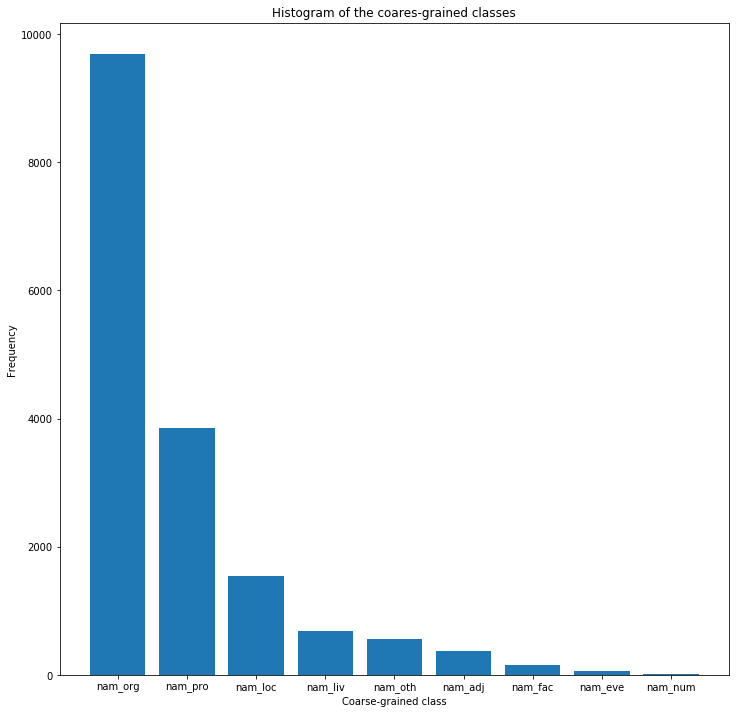

In [337]:
#zad8
plt.figure(figsize=(12,12))
plt.bar(list(map(lambda x: x[0], class_feq_list)), list(map(lambda x: x[1], class_feq_list)))
plt.title('Histogram of the coares-grained classes')
plt.xlabel("Coarse-grained class")
plt.ylabel("Frequency")
plt.show()

In [355]:
cg_classes_with_elems['nam_oth']
cg_classes_with_elems_top_10_sorted = {}
for key, items_dict in cg_classes_with_elems.items():
    tuple_list= list(items_dict.items())
    tuple_list.sort(key= lambda x: -x[1])  
    cg_classes_with_elems_top_10_sorted[key]=tuple_list[:10]

In [356]:
#zad9
cg_classes_with_elems_top_10_sorted

{'nam_org': [('Unii Europejskiej', 302),
  ('Skarbu Państwa', 291),
  ('Rada Ministrów', 261),
  ('Państwowej Straży Pożarnej', 237),
  ('Minister Sprawiedliwości', 232),
  ('Prezes Rady Ministrów', 212),
  ('Minister Obrony Narodowej', 154),
  ('Minister Finansów', 151),
  ('Urzędu Ochrony Państwa', 132),
  ('EFTA', 114)],
 'nam_loc': [('Rzeczypospolitej Polskiej', 815),
  ('Rzeczpospolita Polska', 56),
  ('Polsce', 51),
  ('Rzeczpospolitą Polską', 41),
  ('Warszawie', 32),
  ('Warszawy', 20),
  ('Nawóz', 19),
  ('Warszawa', 16),
  ('Konfederacji Szwajcarskiej', 11),
  ('Polską', 10)],
 'nam_pro': [('Dz . U .', 1577),
  ('Times', 205),
  ('Times New Roman', 90),
  ('Dz . Urz', 81),
  ('Ordynacja podatkowa', 77),
  ('Kodeksu karnego', 64),
  ('Monitor Polski', 62),
  ('Znak', 58),
  ('Spraw Wewnętrznych', 51),
  ('Kodeksu postępowania administracyjnego', 35)],
 'nam_adj': [('polski', 116),
  ('polskiej', 30),
  ('polskiego', 16),
  ('Wojewódzki', 16),
  ('polskim', 10),
  ('polska', 9)

In [358]:
all_elems_list = []
for key, items_dict in cg_classes_with_elems.items():
    all_elems_list.extend(list(map(lambda x: (key,x[0],x[1]),list(items_dict.items()) )))
all_elems_list.sort(key = lambda x: -x[2])

In [359]:
all_elems_list[:50]

[('nam_pro', 'Dz . U .', 1577),
 ('nam_loc', 'Rzeczypospolitej Polskiej', 815),
 ('nam_org', 'Unii Europejskiej', 302),
 ('nam_oth', 'zł', 293),
 ('nam_org', 'Skarbu Państwa', 291),
 ('nam_org', 'Rada Ministrów', 261),
 ('nam_org', 'Państwowej Straży Pożarnej', 237),
 ('nam_org', 'Minister Sprawiedliwości', 232),
 ('nam_org', 'Prezes Rady Ministrów', 212),
 ('nam_pro', 'Times', 205),
 ('nam_org', 'Minister Obrony Narodowej', 154),
 ('nam_org', 'Minister Finansów', 151),
 ('nam_org', 'Urzędu Ochrony Państwa', 132),
 ('nam_adj', 'polski', 116),
 ('nam_org', 'EFTA', 114),
 ('nam_org', 'Państwowa Komisja Wyborcza', 110),
 ('nam_org', 'Urząd Patentowy', 104),
 ('nam_org', 'Europejskiego Porozumienia o Wolnym Handlu', 103),
 ('nam_org', 'Skarb Państwa', 98),
 ('nam_org', 'Państwowej Komisji Wyborczej', 98),
 ('nam_pro', 'Times New Roman', 90),
 ('nam_oth', 'euro', 90),
 ('nam_org', 'Prezes Urzędu', 88),
 ('nam_org', 'OKRĘG', 81),
 ('nam_org', 'Okręgowej Komisji Wyborczej', 81),
 ('nam_pro', 

### Which of the method (counting expressions with capital letters vs. NER) worked better for the task concerned with identification of the proper names?
Ner has the advantego that a name can contain words starting without capital letter 'Europejskiego Porozumienia o Wolnym Handlu'. This name cannot be found via previous method.

### What are the drawbacks of the method based on capital letters?
Same problem mentioned in question 1. Also due to simpcity it can oftern find things that are not names like 'Ustawa'

### What are the drawbacks of the method based on NER?
Some expressions are not counted together as they should  ('Minister Sprawiedliwości', 232) and ('Ministra Sprawiedliwości', 51) which are not counted together and they counted together with simple method ('Minister Sprawiedliwość', 167). But we can clearly see that some where missed in second method

### Which of the coarse-grained NER groups has the best and which has the worst results? Try to justify this observation.
nam_org. Manaual reading shows taht most (if not all ) nam_org's found are proper names. Worst is 'nam_num' as even if they had somemeaning we have no way to decipher where those particular numbers come from. 

### Do you think NER is sufficient for identifying different occurrences of the same entity (i.e. consider "USA" and "Stany Zjednoczone" and "Stany Zjednoczone Ameryki Północnej") ? If not, can you suggest an algorithm or a tool that would be able to group such names together?
WE can take examples of ('Rzeczypospolitej Polskiej', 815) and ('Rzeczpospolita Polska', 56) not counted together. But since all were indetified, we can after NER lemitised all found names and concatenate results. 


### Can you think of a real world problem that would benefit the most from application of Named Entity Recognition algorithm?
Actually a rather data transfer heavy idea, would be to automatically select all Names and make a search of their general meaning (like when you google and it shows this little few lines of what it's about) and user would only mouse over such name and get preloaded result instatly without having alt+tab to google. 